In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Generate 100 random points in (x, y) format
X = np.random.randint(15, 80, size=(55, 2))
outliers = np.array([[110, 110], [125, 125], [130, 100], [2, 1], [4, 3]])

# Append the outliers to the original dataset
X = np.vstack([X, outliers])
print(X)

[[ 37  31]
 [ 41  42]
 [ 79  62]
 [ 49  34]
 [ 35  69]
 [ 32  16]
 [ 54  16]
 [ 47  78]
 [ 23  41]
 [ 45  23]
 [ 20  70]
 [ 57  15]
 [ 68  60]
 [ 42  67]
 [ 71  50]
 [ 54  72]
 [ 56  20]
 [ 64  63]
 [ 39  53]
 [ 53  18]
 [ 39  37]
 [ 56  50]
 [ 19  41]
 [ 18  36]
 [ 68  78]
 [ 72  53]
 [ 44  25]
 [ 40  55]
 [ 44  57]
 [ 42  20]
 [ 34  17]
 [ 32  41]
 [ 32  43]
 [ 60  17]
 [ 48  24]
 [ 54  18]
 [ 16  20]
 [ 43  20]
 [ 45  78]
 [ 33  73]
 [ 56  16]
 [ 57  45]
 [ 46  64]
 [ 59  47]
 [ 35  31]
 [ 74  70]
 [ 76  76]
 [ 72  34]
 [ 75  42]
 [ 73  72]
 [ 39  79]
 [ 74  42]
 [ 36  31]
 [ 43  65]
 [ 71  47]
 [110 110]
 [125 125]
 [130 100]
 [  2   1]
 [  4   3]]


<Axes: >

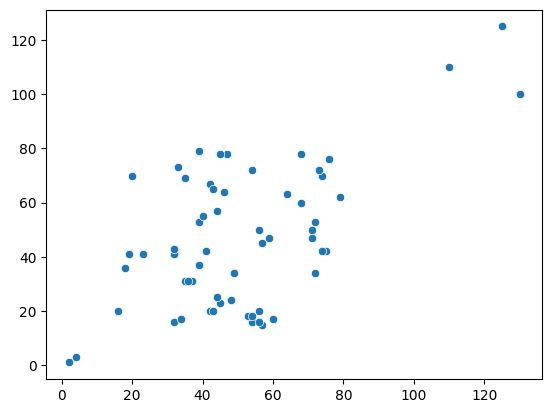

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])

In [ ]:
clustering = DBSCAN(eps=11, min_samples=4)

In [ ]:
clustering.fit_predict(X)

array([ 0,  0,  3,  0,  1,  0,  0,  1,  0,  0, -1,  0,  2,  1,  2,  1,  0,
        2,  1,  0,  0, -1,  0,  0,  3,  2,  0,  1,  1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  1,  1,  0, -1,  1, -1,  0,  3,  3,  2,  2,  3,  1,
        2,  0,  1,  2, -1, -1, -1, -1, -1])

In [ ]:
labels = clustering.fit_predict(X)

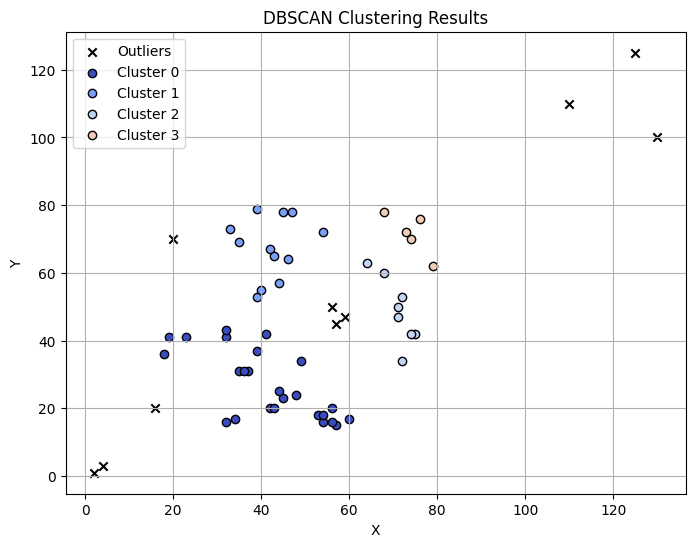

In [ ]:
# Plot the clustering results
plt.figure(figsize=(8, 6))

# Assign colors to clusters (unique colors for different labels)
unique_labels = np.unique(labels)

for label in unique_labels:
    # Different colors for each cluster, and 'k' (black) for outliers
    if label == -1:
        color = 'k'  # Black color for outliers
        marker = 'x'  # Use 'x' marker for outliers
    else:
        color = plt.cm.get_cmap('coolwarm') (label / len(unique_labels))
        marker = 'o'  # Regular points with 'o' marker

    # Plot the points corresponding to this label
    plt.scatter(X[labels == label, 0], X[labels == label, 1],
                c=[color], label=f'Cluster {label}' if label != -1 else 'Outliers',
                marker=marker, edgecolors='k')

# Add plot title and labels
plt.title('DBSCAN Clustering Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
